# Using Bayesian Inference in predicitve models: Premier League standings

### Author: Oscar Martínez Franco

### Subject: Statistical Modeling and Inference

### Professor: Omiros Papaspiliopoulos


## 1. Aim

The aim of this project is to predict the standings of the Premier League for the 18-19 season given that the league currently is in Week 13 out of 38. With the tools provided by Bayesian Inference alongside with the prior knowledge of the matches that have been played so far and some sport analytic's tools, a predictive model and its results will be obtained. All this will be implemented in Python 3 with special emphasis on the pyMC3 library, a package extremely suitable for Bayesian statistics.

## 2. Theoretical introduction

### 2.1. Introduction to Bayes theorem

To comprehend Bayesian inference, the Bayes theorem needs to be understood first. This theorem is one of the most famous equations in probabilistic theory. It basically uses prior knowledge  to calculate the probability of an event. The most basic representation is shown next: 

$$
\begin{equation}
P(A|B)= \frac{P(A)·P(B|A)}{P(B)}  
\end{equation}
$$

In the previous equation, $P(A|B)$ refers to the conditional probability of event A taking place given that B has already occurred. Of course, $P(B|A)$ is the likelihood of B knowing that A has happened. In addition, $P(A)$ and $P(B)$ are the marginal probabilities of observing A and B, respectively. This last expression can be derived from the definition of conditional probability, because as we know: 
$$
P(A|B)=\frac{P(A \cap B)}{P(B)}, \quad \textrm{for} \quad P(B)\neq0 \\
P(A\cap B)=P(B\cap A) \rightarrow \frac{P(A | B)}{P(A)}=\frac{P(B | A)}{P(B)} \\
P(A|B)=\frac{P(B|A)·P(A)}{P(B)}
$$ 
Taking all these into consideration, what this equation is doing is modifying $P(A)$ due to the prior knowledge of the event B. This can clearly be seen with the following image where we have three curves corresponding to the prior belief (i.e. $P(A)$), the evidence (i.e. $P(B|A)$ and $P(B)$) and the posterior belief (i.e. $P(A|B)$). 
![title](bayestheorem.png)
Please note that this representation does not intend to be mathematically accurate, just a visual representation of the implications of the theorem. It can be appreciated how the evidence has changed the prior belief likelihood into the posterior belief. A more general way to express the Bayes theorem is when we have a single event from a sample space $A={A_{1} ,...A_{j},...,A_{n}}$:

$$
\begin{equation}
P(A_i |B)= \frac{P(A_i)·P(B|A_i)}{\sum_j P(B|A_j)·P(A_j)}  
\end{equation}
$$

### 2.2. Introduction to statistical inference
  

Statistical inference is the process of learning from incomplete data. Of course, this area is incredibly broad and a detailed and complete explanation would take many pages. As a consequence, here only the basic concepts and the essence of statistical inference will be shown. 

The way that statistical inference learns from incomplete data is by following two different approaches: **inferring** the parameters of the underlying distribution of the observed datapoints or **estimating** some characteristics of the population from the observed subset of it. The ultimate goal of inference is to build a statistical model and, in that case, the two approaches are usually combined. A very visual way of understanding this is with the following figure extracted from the chapter of *Information Criteria for Statistical Modeling in Data-Rich Era* from *Anh et. al. (2018)*. 

![title](statisticalmodel.png) 

Here, the model is built by combining data (train data), prior knowledge, information from the theory and even the objective that is pursued by the problem in question. From the model a statistical result is obtained and this also gives feedback to improve the model. An essential part of every model is its evaluation using extra data (commonly known as test data). 

In addition of estimating the parameters of a certain model, an important part of statistical inference is assessing the uncertainty related to the parameters obtained. This error is normally related to the standard error (standard deviation of the parameter), which can also be used to build confidence intervals. 

### 2.3. Bayesian inference

Bayesian inference uses the two concepts mentioned above to try to **learn parameters** from incomplete data while taking into account **prior beliefs**. The way this method does this is by using the previously explained Bayes theorem to update our prior belief thanks to some knowledge:

$$
\begin{equation}
P(\theta|X)= \frac{P(\theta)·P(X|\theta)}{\int P(X|\theta)·P(\theta)d\theta} = \frac{P(\theta)·P(X|\theta)}{P(X)}
\end{equation}
$$

In the expression above $P(\theta|X)$ refers to the **posterior** distribution, that is how the knowledge about $\theta$ has been updated after obtaining X. On the right hand side of the equality, $P(\theta)$ corresponds to the **prior** knowledge and $P(X|\theta)$ to the evidence gathered with the new data, that is the **likelihood** distribution. Last, $P(X)$ is the marginal distribution of the data, which is a constant. As a consequence, the Bayes theorem in this case is reduced to:

$$
posterior \propto likelihood·prior
$$
Please notice that normally more than one parameter is used, therefore $\theta$ can refer to a set of parameters such that 

$$
\theta=\theta_1,...,\theta_n
$$

If the variable observed corresponds to a normal distribution, the likelihood function for the mean ($p(X|\mu)$) is the following:
$$
\begin{equation}
p(X|\mu,\sigma)=\prod_{n=1}^N p(x_n|\mu)=\frac{1}{(2\pi\sigma^2)^{N/2}}exp \left\lbrace -\frac{1}{2\sigma ^2}\sum_{n=1}^N (x_n -\mu )² \right\rbrace
\end{equation}
$$

Note that if the prior distribution, $p(\mu)$ in this example, is chosen to be a Gaussian the posterior distribution (product of the prior and the likelihood function) will be a product of two Gaussians and, hence, a Gaussian.

One of the most interesting implications of Bayesian inference is the ability to predict future values thanks to what is known as the **predictive distribution**, that can be seen as follows:
$$
\begin{equation}
P(x_{future}|X)=\int P(x_{future}|\theta)·P(\theta|X)d\theta
\end{equation}
$$

This application will be further studied in this work, as the outcome of the Premier League will try to be predicted using as a prior knowledge the matches that have been played so far.

#### 2.3.1. The importance of the prior

The election of the adequate prior will not be critical for large sample sizes, as the different choices of $P(\theta)$ will have reduced effects on the results of the inference. However, when it comes to small samples the choice of $ P(\theta)$ gains some more importance. 

Priors can be divided into three classes depending on the degree of information that they carry: informative, weakly informative and uninformative. However, depending on the literature, some authors may classify them into four classes, adding least informative priors to the list (*Kumam et. al.,2017*). Without wanting to enter into detail, an informative prior gives information that is crucial for the estimation of the model and gives specific information about a variable. This kind of prior can come from previous knowledge about the topic, from literature or from past data. A weakly informative prior is that which does not give crucial information about a variable but is avoiding to obtain certain results that are consistent from the likelihood but inconsistent with the problem studied. Last, uninformative priors give general or objective information about a variable. One example of that is a prior from a uniform distribution that assigns the same value of probability to all the outcomes.

To set an appropriate  prior there are some "advice" that can be followed (*Green, M., 2017*):

- Set the priors around what you believe the true lays
- Set the magnitude of the prior in the same order as the predicted phenomenon
- Do not try to set a highly restrictive prior (e.g. a normal distribution with very low standard deviation)
- Try to use as less as possible completely uninformative priors (e.g. uniform distributions)

### 2.4. Example

To apply what has just been explained a really simple example will be carried out.

Imagine that we are professors in a Data Science master and we have the records of previous years results for our subject. We know that our stored results follow a normal distribution with mean 6.0 and standard deviation of 0.5. This is our prior belief. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import matplotlib.mlab as mlab
import math
import seaborn as sns
import numpy as np
import sklearn.mixture
import pymc3 as pm
import theano
import pandas as pd
from time import perf_counter
sns.set()

/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


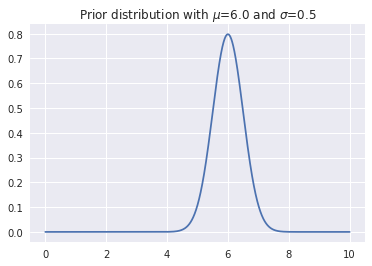

In [2]:
def plot_gaussian (x,mu,sigma): #we create a function with the expression of a normal distribution
    y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))
    return y

prior_mean=6.0 #we set the mean and the std for the prior
prior_std=0.5
x=np.linspace(0,10,2000) #we create the x axis and use it to get the y axis
y_prior=plot_gaussian(x,prior_mean,prior_std)
plt.plot(x,y_prior,label='Prior distribution')
plt.title('Prior distribution with $\mu$=6.0 and $\sigma$=0.5')
plt.show()

Now we obtain the qualification of this year students (20 in total) and we wish to calculate the new posterior distribution. 

We first need to find the parameters ($\mu$ and $\sigma$) for the distribution of this year. We will find these parameters as a result of the maximum likelihood estimator. We have mentioned before that the likelihood function for a normal distribution is the following:

$$
\begin{equation}
p(X|\mu,\sigma)=\prod_{n=1}^N p(x_n|\mu,\sigma)=\frac{1}{(2\pi\sigma^2)^{N/2}}exp \left\lbrace -\frac{1}{2\sigma ^2}\sum_{n=1}^N (x_n -\mu )² \right\rbrace
\end{equation}
$$

From this we obtain the log-likelihood:

$$
\begin{equation}
log p(X|\mu,\sigma)=log\prod_{n=1}^N p(x_n|\mu,\sigma)=\sum_{n=1}^N log p(x_n | \mu,\sigma)= \\
=\sum_{n=1}^N log \frac{1}{(2\pi\sigma^2)^{N/2}}- \sum_{n=1}^N \frac{1}{2\sigma ^2} (x_n -\mu )² 
\end{equation}
$$

Now we have to find the $\mu$ and $\sigma$ that make this expression maximal when we input the student results ($x_n$). The intuitive way of doing this is to just input the different x into the expression above and differentiate with respect to $\mu$ and equal to 0 (same for $\sigma$) and a system with two variables and two equations is obtained. However, to make things easier and faster we will use the *sklearn* package to fit a normal distribution to our data and to obtain the $\mu$ and the $\sigma$.

/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/oscarmartinez/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/oscarmartinez/anaconda3/lib/python3.6/site-packa

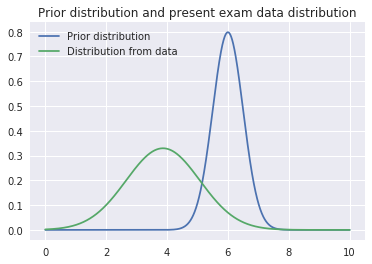

Mean of the present exam distribution: 3.87
Standard deviation of the present exam distribution: 1.21


In [3]:
gmm = sklearn.mixture.GMM() #function that will try to fit a gaussian distribution to our data
np.random.seed(1)#we initialize a seed to obtain always the same random numbers
x_n=np.random.normal(loc=4.0,scale=1,size=20) #we create the results of this year from a random normal distribution
params=gmm.fit(x_n[:, np.newaxis])#we fit the normal distribution to our data
data_mean=params.means_[0,0]#we obtain the mean and std for the 20 datapoints
data_std=params.covars_[0,0]

x=np.linspace(0,10,2000) #we plot the prior and the likelihood
y_prior=plot_gaussian(x,prior_mean,prior_std)
y_data=plot_gaussian(x,data_mean,data_std)
plt.plot(x,y_prior,label='Prior distribution')
plt.plot(x,y_data,label='Distribution from data')
plt.title('Prior distribution and present exam data distribution')
plt.legend(loc='upper left')
plt.show()

print('Mean of the present exam distribution: '+str(round(data_mean,2)))
print('Standard deviation of the present exam distribution: '+str(round(data_std,2)))

Now we have our prior knowledge and the distribution of results from this last exam (likelihood). We want to see how the prior belief has changed given this exam results ($P(\theta|X)$. Therefore, we just need to multiply the prior times the likelihood.


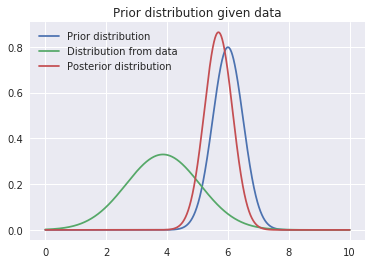

Mean of the posterior distribution: 5.69
Standard deviation of the posterior distribution: 0.46


In [4]:
def gaussian_mult(mu1,mu2,std1,std2): #function to calculate the mean and std for the product of two gaussians
    std3=np.sqrt((std1**2*std2**2)/(std1**2+std2**2))
    mu3=(mu1*std2**2+mu2*std1**2)/(std1**2+std2**2)
    return mu3,std3

post_mean,post_std=gaussian_mult(prior_mean,data_mean,prior_std,data_std)
x=np.linspace(0,10,2000) #we obtain the posterior std and mean and plot it
y_prior=plot_gaussian(x,prior_mean,prior_std)
y_data=plot_gaussian(x,data_mean,data_std)
y_post=plot_gaussian(x,post_mean,post_std)
plt.plot(x,y_prior,label='Prior distribution')
plt.plot(x,y_data,label='Distribution from data')
plt.plot(x,y_post,label='Posterior distribution')
plt.title('Prior distribution given data')
plt.legend(loc='upper left')
plt.show()

print('Mean of the posterior distribution: '+str(round(post_mean,2)))
print('Standard deviation of the posterior distribution: '+str(round(post_std,2)))

We can see that this year's class has performed lower than previous years, with a mean of 3.87 and a standard deviation of 1.21. These results have resulted in a posterior distribution with mean 5.69 and standard deviation of 0.46. This quick example was just to illustrate the power, but yet simplicity, of the Bayesian Inference method.

## 3. Implementation 

### 3.1. Model proposed 

Our study is focused in the Premier League where there are a total of 20 teams $\left\lbrace i=1,....,i=20 \right\rbrace$ who play against each other twice a season (home of one team and home of the other). Therefore, there are 380 games $\left\lbrace g=1,....,g=380 \right\rbrace$ per season. For this case a Single-Independent model (SI) will be used. This model assumes that the number of goals by the home team are independent from those of the away team and vice versa. One could argue that there exists a correlation between the home goals and away goals in a match. As a team who is more offensive and scores more goals will push the rival to try to equalize and, therefore, score more goals also. However, we will neglect this effect. However here we will stick with the structure of the SI model. 

SI model considers that the number of goals scored only depends on the attacking ability of the team, the defensive skills of its rival and the home ground advantage. These three factors, alongside with the average goals scored (which will be the same for all teams), will be part of the *\lambda* of the Poisson distribution. This is the case of the paper from Baio, G. and Blangiardo, M. (2010).  

The next step is to create our model to predict the output of a game. The purpose of this model is to predict the home goals (FTHG: full time home goals) and the away goals (FTAG: full time away goals). As Van Wijk (2012) mentions in its paper, the goals scored in a match can be modeled as a Poisson distribution and that the most successful and accurate models are the ones that take into account the average number of goals, the attacking qualities of the team and the defensive skills of the rival. We will express FTHG per game and for the home team and away team (j sub index, j=1 home team and j=2 away team). 

$$ 
\theta_{jg}|\lambda_{gj} \sim Poisson(\lambda_{gj}) \\ 
\lambda_{g1}=exp(avg+ home+ off_1-def_2 \\ 
\lambda_{g2}=exp(avg- home+ off_2-def_1  
$$ 

Where *avg* is the average number of goals which will be the same for every team, *home* is the home advantage which is supposedly the same for every team also, $off_1$ and $off_2$ are the offensive abilities of the home and away team, respectively. The same for $def_1$ and $def_2$ with regard to the defensive skills. Last, $\theta_jg$ corresponds to FTHG when g=1 and FTAG when g=2. Following the literature, all these variables will be modeled as a normal distribution. 

$$ 
avg \sim N(1,1)\\ 
home \sim N(0,1)\\ 
off \sim N(0,0.5)\\ 
def \sim N(0,0.5) 
$$ 

We have set the average goals per team and match to 1 as in the previous season (16-17) the number of goals per team and match was 1.4 (value provided by worldfootball.net). So, we round it for simplicity. 

### 3.2. Prediction of the standings in Premier League 17-18 

For predicting the standings of the Premier League we first start by using last year's results so we can compare with what actually happened. From that dataset we take only the matches until week 13 (end of November) as our prior results and we want to predict the outcome of the others. To do this we will use pyMC3 library.  

#### 3.2.1. Code

First, we can find the functions that will be used all through  this process. We basically have function for the cleaning and preprocessing of the data (*get_teams(), get_matches() and get_goals()*) and some other for the postprocessing (*predict_points() and standings_probs()*).

In [5]:
def get_teams(matches): #input: pandas dataframe with columns HomeTeam and AwayTeam
    teams=matches.HomeTeam.unique() #gets the teams present 
    teams=pd.DataFrame(teams,columns=['team']) #turns it into a DF with column labeled team and indeces
    teams['i']=teams.index
    return teams #output: pandas (pd) DF

def get_matches(matches,teams):#input: pandas dataframe with HomeTeam and AwayTeam and pd DF from the get_teams()
    matches=pd.merge(matches,teams,left_on='HomeTeam',right_on='team',how='left')#left merge from the HomeTeam and teams
    matches=matches.rename(columns={'i':'ihome'}).drop('team',1) #create a new column ihome with teams labeled with an integer
    matches=pd.merge(matches,teams,left_on='AwayTeam',right_on='team',how='left')#same with AwayTeam
    matches=matches.rename(columns={'i':'iaway'}).drop('team',1)
    home_team=matches.ihome.values #creates two arrays with the home teams and the away teams for every match
    away_team=matches.iaway.values
    
    return matches,home_team,away_team #output: matches pd DF, two arrays with teams as integers

def get_goals(matches): #input: pd DF from get_matches()
    observed_home_goals=matches.FTHG.values #creates two arrays with the goals of the home and away team
    observed_away_goals=matches.FTAG.values
    
    return observed_home_goals, observed_away_goals#output: two arrays containing goals as integers
    
def predict_points(post_pred,matches_upcoming):#input: a collections.defaultdict object which is obtaining after the sampling
    rows=post_pred['FTHG'].shape[1] #assign the columns of the post_pred to the row var
    cols=post_pred['FTHG'].shape[0] #we want our predicted matrices to have the "inverted" shape of post_pred
    pred_home_points=np.zeros((rows,cols))#we allocate memory space for our two matrices
    pred_away_points=np.zeros((rows,cols))
    sim_index=[] #labels of the columns to indictate from which sample (1st,2nd, ...,n th) is the result from
    for i in range(cols):
        home_win=post_pred['FTHG'][i,:]>post_pred['FTAG'][i,:]#if the home goals > away goals fro that sample
        home_win=home_win.astype(int)*3 #the home team has 3 points (True==1) if not 0 point (False==0)
        home_draw=post_pred['FTHG'][i,:]==post_pred['FTAG'][i,:]# if the goals are the same
        home_draw=home_draw.astype(int)#the home teas has 1 point, otherwise, 0
        home_points=home_win +home_draw#the home points for that sample
        pred_home_points[:,i]=home_points #we assign the predicted home points to the matrix
        away_win=post_pred['FTHG'][i,:]<post_pred['FTAG'][i,:] #exactly the same for away case
        away_win=away_win.astype(int)*3
        away_draw=post_pred['FTHG'][i,:]==post_pred['FTAG'][i,:]
        away_draw=away_draw.astype(int)
        away_points=away_win +away_draw
        pred_away_points[:,i]=away_points

        sim_index.append('sim_points_{}'.format(i)) #this will correspond to simulation i
        
    df_home_point=pd.DataFrame(data=pred_home_points.astype(int),columns=sim_index)#numpy array to pd DF
    df_home_point.insert(0,'team',matches_upcoming['HomeTeam'])#we assign the integer labels to the name of the team

    df_away_point=pd.DataFrame(data=pred_away_points.astype(int),columns=sim_index)
    df_away_point.insert(0,'team',matches_upcoming['AwayTeam'])
    return df_home_point,df_away_point #output: two pd DF containing the outputs in terms of points for every match for every simulation

def standings_probs(standing_dict):#input: a dictionary containing the possible position of a team (e.g. '1 Man City') and the probability of this happening
    first_prob=[]#substract the odds of the teams that have chances different than 0 of being 1st, 2nd, 3rd, last and penultimate
    first_team=[]#substract also the name of the team
    second_prob=[]
    second_team=[]
    third_prob=[]
    third_team=[]
    last_prob=[]
    last_team=[]
    penultimate_prob=[]
    penultimate_team=[]

    for k,v in standing_dict.items(): #k=keys and v=values of the dictionary with all the possibilities, 
        if k.startswith('1 '):#for the 1st
            first_team.append(k[2:])#we remove the position of the name and append it ot the name list
            first_prob.append(round(v,2))#we round the chances and append if to the probabilities list
        elif k.startswith('2 '): #same for all the positions
            second_team.append(k[2:])
            second_prob.append(round(v,2))
        elif k.startswith('3 '):
            third_team.append(k[2:])
            third_prob.append(round(v,2))
        elif k.startswith('20 '):
            last_team.append(k[3:])
            last_prob.append(round(v,2))
        elif k.startswith('19 '):
            penultimate_team.append(k[3:])
            penultimate_prob.append(round(v,2))
    
    return first_team,first_prob,second_team,second_prob,third_team,third_prob,last_team,last_prob,penultimate_team,penultimate_prob
            #output: all the lists with the names and the probabilities

def draw_prob_plots(standings_sim,position): #input: a pandas DF with the probabilities of each team and position and an integer for the position to plot
    standing_position=standings_sim.loc[:, position]#extract the column corresponding to the rank we want to analyze
    teams_list=[i for i in standing_position.index]#get the names of the teams in a list
    ax = sns.barplot(x=teams_list, y=standing_position.values)#plot the names with the probabilities in a barplot
    plt.xticks(rotation=75)
    plt.ylabel("Probability (%)")
    plt.title('Probability for teams to finish '+str(int(position))+' in the 17-18 season')

The first step is to start with cleaning and rearrange the past data with the previously mentioned functions to get the home and away goals, the list of teams, and the matches with the teams labeled integers. For the upcoming games we obviously do not have the home and away goals, so we only get the matches.

In [6]:
matches_csv=pd.read_csv('premier_league_17-18.csv') #read the csv file and turn it into a pd DF
matches_upcoming_csv=pd.read_csv('upcoming_matches_17-18.csv')# for the past matches and the upcoming ones 

In [7]:
teams=get_teams(matches_csv) #we get the unique teams, the matches, the df with the home teams and away teams with integer labels 
matches,home_team,away_team=get_matches(matches_csv,teams)
observed_home_goals,observed_away_goals=get_goals(matches)#also get goals for away and home teams. All this for past matches

In [8]:
matches_upcoming,home_team_upcoming,away_team_upcoming=get_matches(matches_upcoming_csv,teams) #get matches and teams with labels for the upcoming games

In [9]:
matches_upcoming.head(5)

,HomeTeam,AwayTeam,ihome,iaway
0,West Ham,Leicester,19,12
1,Crystal Palace,Stoke,3,14
2,Liverpool,Chelsea,13,2
3,Man United,Brighton,8,1
4,Newcastle,Watford,9,6


In this case we want to build a model with the prior knowledge and then make the predictions  with the upcoming matches. Therefore, the model is going to be compiled with what is known as shared variables (from the theano package). In this way the values of these variables can be changed when it is time to do the prediction.

In [10]:
observed_home_goals_shared=theano.shared(observed_home_goals)#create the shared variables to input in the model using theano
observed_away_goals_shared=theano.shared(observed_away_goals)
home_team_shared=theano.shared(home_team)
away_team_shared=theano.shared(away_team)

In [11]:
toc=perf_counter()
with pm.Model() as model_predict:#create the model using pyMC3 (pm)
    avg=pm.Normal('avg',mu=1,sd=1) #average goals
    home_adv=pm.Normal('home_adv',mu=0,sd=1)#home advantage
    off_ab=pm.Normal('off_ab',mu=0,sd=0.5,shape=len(teams)) #offensive ability
    def_ab=pm.Normal('def_ab',mu=0,sd=0.5,shape=len(teams)) #defensive ability
    
    lambda_home=np.exp(avg+home_adv+off_ab[home_team_shared]-def_ab[away_team_shared])#lambdas for the Poisson for away and home
    lambda_away=np.exp(avg-home_adv+off_ab[away_team_shared]-def_ab[home_team_shared])
    
    FTHG=pm.Poisson('FTHG',mu=lambda_home,observed= observed_home_goals_shared) #away and home goals as Poisson
    FTAG=pm.Poisson('FTAG',mu=lambda_away,observed=observed_away_goals_shared)
tic=perf_counter()
print('Elapsed time: '+str(round(tic-toc,3))+'s')

Elapsed time: 2.817s


As it can be seen, the compilation was quite quick, lasting only 2.817s.

Once our model is compiled we need to sample it to build the variable values. For this we use the sample function available in pyMC3. We will put three arguments in this function: draws, tune and njobs. The first one is used to specify how many samples will be drawn. The second one is the number of iterations used to tune the model. The latter refers to how many chains will sample each variable. For example, if 4 and draws=10000 it means that each variable will be sampled 10000 times by each chain.

In [12]:
n_samples=10000 #samples to draw by each chain
tune_samples=1000 #samples to tune by every chain

If we compile the model and plot the trace we get the following graphs with the distribution of the variables for the different chains. We can see how a team with an outstanding offensive ability (close to one). The plots on the left are the samples generated by each chain and its value. We see that for the average goals and the home advantage all the different samples are overlapped one with the other, that is because they are the same for all teams. However, we can see changing colors when it comes to the defensive and offensive  ability, which vary by team. We will see all these more clearly with some more graphs.

All this process took about 50.3s, which is a considerable amount of time.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [def_ab, off_ab, home_adv, avg]
Sampling 4 chains: 100%|██████████| 44000/44000 [00:46<00:00, 950.46draws/s] 
The number of effective samples is smaller than 25% for some parameters.


Elapsed time: 50.303s


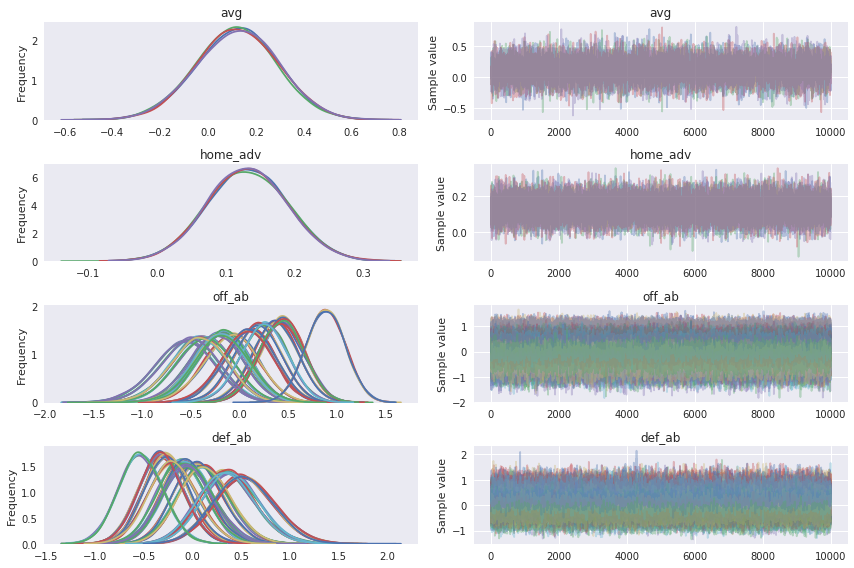

In [13]:
toc=perf_counter()
with model_predict:#sample the model with the priors
    trace=pm.sample(draws=n_samples,tune=tune_samples,njobs=4)
    pm.traceplot(trace)
tic=perf_counter()
print('Elapsed time: '+str(round(tic-toc,3))+'s')

Here we can see the offense ability for each team when each team has played 13 games. It is obvious that one team stands among the others: Manchester City. We also have Chelsea, Arsenal, Liverpool and Tottenham as quite offensive teams. For the defensive graph we see that Manchester City is not quite a force and Manchester United is quite leveled. We see some unexpected teams that have quite a remarkable defense, such as Burnley.

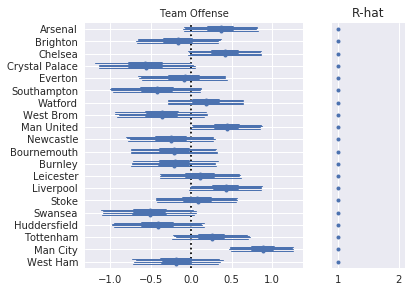

In [14]:
labels=teams.team.values
pm.forestplot(trace,varnames=['off_ab'],ylabels=labels,main='Team Offense')

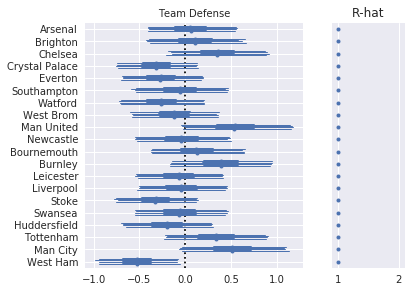

In [15]:
labels=teams.team.values
pm.forestplot(trace,varnames=['def_ab'],ylabels=labels,main='Team Defense')

Now that we have our prior information in the model we have to input the future data to predict the posterior distribution. In order to do that we have to change the values of the shared variables and do a posterior predictive check sampling. This kind of sampling is based on Markov chain Monte Carlo algorithm (MCMC). This algorithm generates data from the model with the specified parameters and checks how these data deviates from the true distribution. 

To better understand how the posterior is obtained a brief explanation of the MCMC algorithm will be given. As its name suggest, this method has two components: the Monte Carlo algorithm and the Markov chain. First, a random parameter to start with is picked. Then the Monte Carlo algorithm will start to generate random values for the parameter in question. Then for a pair of values the algorithm computes which one is more likely to explain better the data given our prior beliefs. Then the better one is added to the Markov chain with a certain probability, which is determined by how much better this value is. By doing large samples we will obtain parameters with values that will be closer to the real ones. However, by doing a greater number of simulations the computing time increases rapidly and for 44.000 simulations the process lasted for about 15 minutes. 

In [16]:
home_team_shared.set_value(home_team_upcoming) #change the value of the shared variables to do the prediction
away_team_shared.set_value(away_team_upcoming)
observed_home_goals_shared.set_value([0]*len(home_team_upcoming))
observed_away_goals_shared.set_value([0]*len(home_team_upcoming))

In [17]:
n_samples_predict=(n_samples+tune_samples)*4 #number of samples that will be predicted

In [18]:
toc=perf_counter()

post_pred=pm.sample_ppc(trace,model=model_predict,samples=n_samples_predict) #prediction using MCMC algorithm

tic=perf_counter()
print('Elapsed time: '+str(round(tic-toc,3))+'s')

100%|██████████| 44000/44000 [15:21<00:00, 47.73it/s]

Elapsed time: 921.833s


In [19]:
df_home_point,df_away_point=predict_points(post_pred,matches_upcoming) #predicting the points for each team for each match

Now we will sum all the points for each team for every simulation and thus we will obtain the standings for every simulation.

In [20]:
standings=df_home_point.groupby('team').sum().add(df_away_point.groupby('team').sum())#add the home and away points be team  

In [21]:
standings

,sim_points_0,sim_points_1,sim_points_2,sim_points_3,sim_points_4,sim_points_5,sim_points_6,sim_points_7,sim_points_8,sim_points_9,...,sim_points_43990,sim_points_43991,sim_points_43992,sim_points_43993,sim_points_43994,sim_points_43995,sim_points_43996,sim_points_43997,sim_points_43998,sim_points_43999
team,,,,,,,,,,,,,,,,,,,,,
Arsenal,49,25,53,57,37,37,64,42,30,50,...,49,43,42,23,53,46,38,59,40,50
Bournemouth,36,29,29,30,29,29,24,42,27,38,...,35,30,45,43,38,24,41,28,33,36
Brighton,27,24,31,37,30,43,42,28,36,23,...,36,20,45,22,27,28,23,33,19,37
Burnley,34,53,36,34,51,30,39,42,49,23,...,30,57,19,57,46,34,39,22,48,41
Chelsea,42,51,40,56,69,53,41,54,38,45,...,42,51,36,56,51,67,61,51,60,59
Crystal Palace,17,34,16,14,10,22,26,9,17,15,...,22,15,29,21,40,25,23,14,31,12
Everton,40,44,36,30,28,32,22,31,26,21,...,34,25,36,30,43,31,36,27,34,32
Huddersfield,37,15,28,16,27,17,30,33,50,15,...,29,25,15,24,22,24,32,20,16,20
Leicester,36,42,17,30,53,33,46,35,27,23,...,53,47,48,31,26,29,39,34,39,46


Now we want to know how many times each team was the 1st, 2nd, 3rd,..., 20th in all the simulations. In this way we will know the probabilities of each team being in each position of the league. We have seen that this process performed with this double loop is highly inefficient as it takes almost 2 hours for the case of 44.000 simulations. For this process first, we go over each column of the dataset (each simulation) and we sort the value sin descending order. Then we iterate over the index list (the teams) and we append each team name and its position to a list of occurrences. After that we count the number of appearances for each value present in the list and we update or append each value to a dictionary. In this way for each iteration we add to this occurrence list the standings and by counting the values we will obtain, for example, how many times '1 Man City' appears on the list. As a consequence, in the in the dictionary we will have how many times, out of 44.000, Man City has been champions. To get the % of each position we just divide each value by the number of simulations and multiply by 100%. However this is not finished, then we use the function *standing_probs()* to get the teams and the % of each finishing in the specified position. 

In [22]:
toc=perf_counter()
standing_tot=[]
standing_dict={}
for i in range(n_samples_predict):#iterate over all the simulations done
    sim=standings['sim_points_{}'.format(i)].sort_values(ascending=False)#take the current simulation and sort it in descending order
    standing_list=sim.index.tolist()#turn the indexes (names of teams) into a list to iterate over it
    for i,team in enumerate(standing_list):
        standing_tot.append(str(i+1)+' '+team)#append the 1st team to the standing list
        standing_dict[str(i+1)+' '+team]=standing_tot.count(str(i+1)+' '+team)#count how many times that team (with that position in the standings) is in the list
        #and put it in the dicitonary

tic=perf_counter()
print('Elapsed time: '+str(round(tic-toc,3))+'s')

Elapsed time: 6329.421s


In [23]:
standing_dict = {k: v/(n_samples_predict/100) for k, v in standing_dict.items()} #divide each value by the number of simulations
#to get the % of times it has achieved that position

In [24]:
first_team,first_prob,second_team,second_prob,third_team,\
third_prob,last_team,last_prob,penultimate_team,penultimate_prob=standings_probs(standing_dict) #get the probs of the 1st, 2nd, 3rd, last and penultimate

A more efficient, fast and short way of doing this previous process is by doing operations inside the data frame, instead of subtracting each column and manipulating its values. 

The first step is to take the standings table that we already built and substitute its points by the position obtained in the league with the function rank. Now we have the standings for each simulation. The main purpose of this is to obtain a table with the positions in the league as names of the columns and then the chances of each teams finishing in that position as the values. In order to do that, we first we need the team names as another column, not as the index and for that we use the *reset_index()* function. Next, we have to reshape the table, currently we have the position of each team for each simulation but now we want to turn our wide table into a long one with a column for the simulation, another for the rank and another for the team (this last part is possible because we do not have teams as index anymore). We will do this by using the *melt()* function with team as the *id_vars* (the variable that we want to keep intact) and rank as the *vars_name* argument so that this column remains unpivoted. Now we can easily count how many times has each team finished in each position by grouping by team and using the *value_counts()* function. Now, we have two variables: team and rank. For each of the 20 teams we have 20 ranks. However we want to have the team name as rows and the ranks as columns. This can be done by using the *unstack()* function with using rank as the level argument, this function has one really useful argument called fill_value. As some of the teams never were in a certain position in all the simulations (for example Man City never was last) we will obtain NaN in that specific ranking. The fill_value allows you to substitute the NaN by a desired value, in this case 0. Last, we will divide each number of occurrences by the number of simulations and multiply it by 100%.  

Note that this operation was performed in **0.417s** which is **10⁴ times faster** than our previous method. Obviously, from now on we will us only this last method. 

In [25]:
toc=perf_counter()

standings_sim = (standings.rank(ascending=False, method='min').reset_index().melt(id_vars='team', value_name='rank').\
            groupby('team')['rank'].value_counts().unstack(level='rank',fill_value=0).div(n_samples_predict/100))

tic=perf_counter()
print('Elapsed time: '+str(round(tic-toc,3))+'s')

Elapsed time: 0.417s


In [27]:
standings_sim

rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0
team,,,,,,,,,,,,,,,,,,,,
Arsenal,2.822727,10.277273,13.168182,14.359091,14.395455,11.888636,9.722727,6.840909,4.990909,3.527273,2.765909,1.763636,1.215909,0.920455,0.613636,0.327273,0.197727,0.127273,0.047727,0.027273
Bournemouth,0.070455,0.756818,1.740909,3.111364,4.797727,6.290909,7.879545,9.018182,9.395455,9.345455,8.704545,7.834091,7.243182,6.354545,5.197727,4.175000,3.231818,2.452273,1.538636,0.861364
Brighton,0.106818,0.750000,1.436364,2.515909,3.977273,5.350000,6.668182,7.965909,8.718182,9.170455,8.684091,8.706818,7.984091,7.115909,6.090909,4.884091,3.959091,2.861364,1.929545,1.125000
Burnley,0.345455,1.840909,3.590909,5.611364,7.281818,8.918182,9.790909,9.859091,9.218182,8.700000,7.663636,6.677273,5.454545,4.595455,3.565909,2.750000,1.809091,1.350000,0.652273,0.325000
Chelsea,9.870455,24.822727,20.565909,15.154545,10.734091,7.100000,4.447727,2.888636,1.736364,1.020455,0.663636,0.404545,0.252273,0.150000,0.088636,0.059091,0.025000,0.015909,0.000000,0.000000
Crystal Palace,0.000000,0.002273,0.027273,0.061364,0.129545,0.261364,0.511364,0.813636,1.234091,1.565909,2.168182,3.004545,3.931818,5.115909,6.520455,8.304545,10.645455,13.877273,17.909091,23.915909
Everton,0.029545,0.229545,0.736364,1.540909,2.350000,3.688636,4.788636,6.000000,6.956818,7.897727,8.340909,8.484091,8.481818,7.802273,7.286364,6.806818,6.036364,5.104545,4.297727,3.140909
Huddersfield,0.006818,0.020455,0.077273,0.147727,0.429545,0.727273,1.170455,1.888636,2.440909,3.290909,4.031818,5.075000,6.234091,7.184091,8.604545,10.384091,11.247727,12.361364,12.761364,11.915909
Leicester,0.288636,1.918182,3.752273,5.934091,7.593182,9.586364,10.427273,10.277273,9.225000,8.459091,7.150000,6.350000,5.136364,4.054545,3.195455,2.340909,1.747727,1.334091,0.777273,0.452273


Once we have the probabilities we will susbtract all the teams that have chances to be the first, second, third, last and penultimate to plot them.

We can see that with almost 70% chance Manchester City will win the league (as it happened). On the next graph we see that the battle for the second position was much more balanced but Manchester United had a little higher chance of finishing second (as it happened last year). However, the prediction says that Chelsea had a, more or less, 20% chance (similar to United) of finishing in 3rd place followed by Tottenham with 12.5% and we know that this last team was the one who finished third. 

If we look at the bottom of the table, the model predicted that either Crystal Palace or West Ham would finish last. Nevertheless, these two teams finished 11th and 13th, respectively. The actual last team, West Brom, had a 6% chance of being the last one according to our model. Last, for the 19th place our model gave as the principal candidates Crystal Palace, West Ham, Swansea, Southampton and Huddersfield. In fact, none of these teams finished 19th, with Swansea (18th) and Southampton (17th) coming close. The actual 19th team (Stoke) had around 3% chances of ending 19th.  

We see that our model does quite a good job for the top spots of the table. However, it fails to predict exactly the bottom teams. As it it generally known in the football world, the bottom teams tend to be more iregular and unpredictive than the top ones and maybe we should try a more elaborate model to try to predict better this situation. 

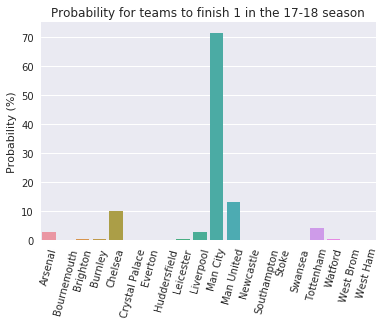

In [28]:
draw_prob_plots(standings_sim,1.0)

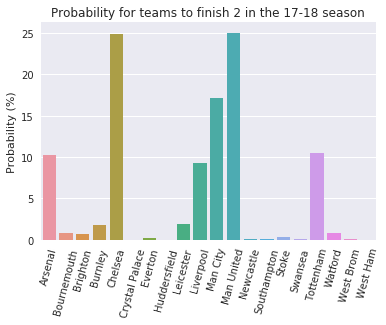

In [29]:
draw_prob_plots(standings_sim,2.0)

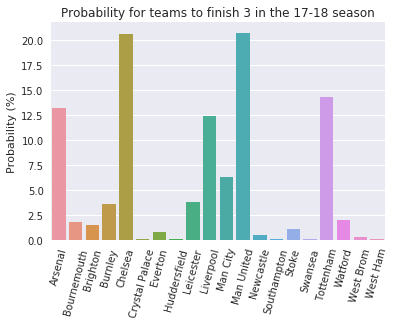

In [30]:
draw_prob_plots(standings_sim,3.0)

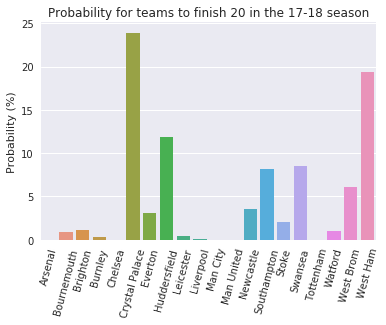

In [31]:
draw_prob_plots(standings_sim,20.0)

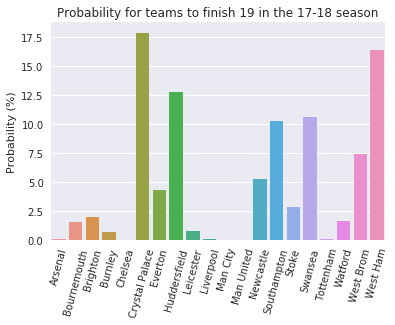

In [32]:
draw_prob_plots(standings_sim,19.0)

### 3.3. Prediction for 18-19 Premier League 

Now it is turn to predict what will happen this season. The procedure is exactly the same as before so we will jump straight to the significant results.

In [33]:
matches_csv_19=pd.read_csv('premier_league_18-19.csv')
matches_upcoming_csv_19=pd.read_csv('upcoming_matches_18-19.csv')

In [36]:
teams_19=get_teams(matches_csv_19)
matches_19,home_team_19,away_team_19=get_matches(matches_csv_19,teams_19)
observed_home_goals_19,observed_away_goals_19=get_goals(matches_19)

In [37]:
matches_upcoming_19,home_team_upcoming_19,away_team_upcoming_19=get_matches(matches_upcoming_csv_19,teams_19)

In [38]:
observed_home_goals_19_shared=theano.shared(observed_home_goals_19)
observed_away_goals_19_shared=theano.shared(observed_away_goals_19)
home_team_19_shared=theano.shared(home_team_19)
away_team_19_shared=theano.shared(away_team_19)

In [39]:
with pm.Model() as model_predict_19:
    avg=pm.Normal('avg',mu=1,sd=1)
    home_adv=pm.Normal('home_adv',mu=0,sd=1)
    off_ab=pm.Normal('off_ab',mu=0,sd=0.5,shape=len(teams_19))
    def_ab=pm.Normal('def_ab',mu=0,sd=0.5,shape=len(teams_19))
    
    lambda_home=np.exp(avg+home_adv+off_ab[home_team_19_shared]-def_ab[away_team_19_shared])
    lambda_away=np.exp(avg-home_adv+off_ab[away_team_19_shared]-def_ab[home_team_19_shared])
    
    FTHG=pm.Poisson('FTHG',mu=lambda_home,observed=observed_home_goals_19_shared)
    FTAG=pm.Poisson('FTAG',mu=lambda_away,observed=observed_away_goals_19_shared)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [def_ab, off_ab, home_adv, avg]
Sampling 4 chains: 100%|██████████| 44000/44000 [01:36<00:00, 455.56draws/s]


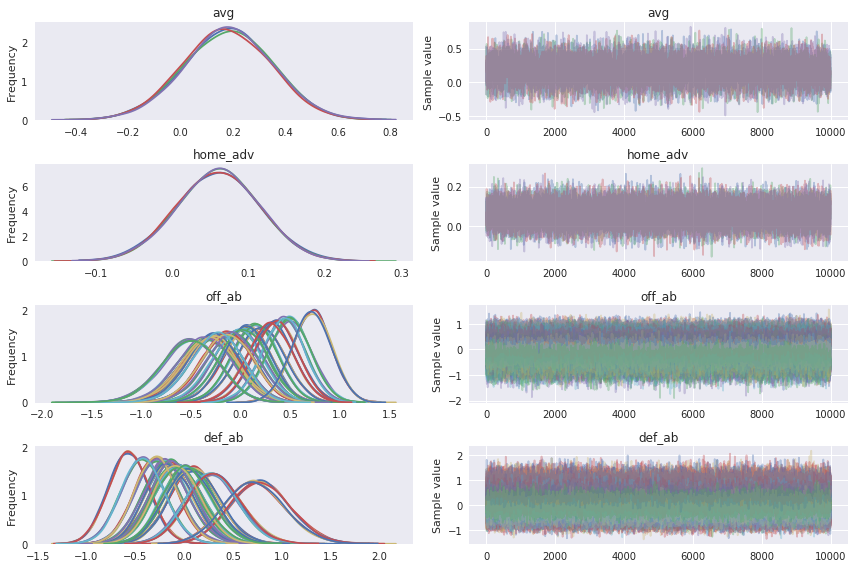

In [40]:
with model_predict_19:
    trace_19=pm.sample(draws=n_samples,tune=tune_samples,njobs=4)
    pm.traceplot(trace_19)

We see that Manchester City is again the most skilled offensive team. However, this time it is not that far from other teams such as Arsenal or Chelsea. On the other hand, there are teams who really struggle when it comes to attack, such as Crystal Palace or Huddersfield. If we look at the defensive ability, we can see that Manchester City is in second position with Liverpool doing a great job. These two teams are quite superior from the rest in this aspect. We can also see that Fulham and Burnley should improve their defense.

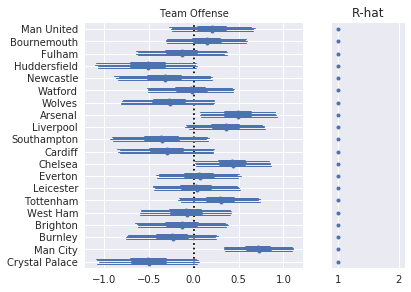

In [41]:
labels=teams_19.team.values
pm.forestplot(trace_19,varnames=['off_ab'],ylabels=labels,main='Team Offense')

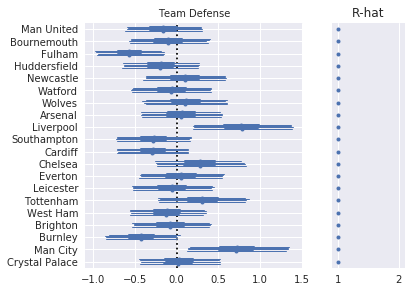

In [42]:
labels=teams_19.team.values
pm.forestplot(trace_19,varnames=['def_ab'],ylabels=labels,main='Team Defense')

In [43]:
home_team_19_shared.set_value(home_team_upcoming_19)
away_team_19_shared.set_value(away_team_upcoming_19)
observed_home_goals_19_shared.set_value([0]*len(home_team_upcoming_19))
observed_away_goals_19_shared.set_value([0]*len(home_team_upcoming_19))

In [44]:
post_pred_19=pm.sample_ppc(trace_19,model=model_predict_19,samples=n_samples_predict)

100%|██████████| 44000/44000 [14:05<00:00, 52.07it/s]


In [45]:
df_home_point_19,df_away_point_19=predict_points(post_pred_19,matches_upcoming_19)

In [46]:
standings_19=df_home_point_19.groupby('team').sum().add(df_away_point_19.groupby('team').sum())                  

In [47]:
standings_19

,sim_points_0,sim_points_1,sim_points_2,sim_points_3,sim_points_4,sim_points_5,sim_points_6,sim_points_7,sim_points_8,sim_points_9,...,sim_points_43990,sim_points_43991,sim_points_43992,sim_points_43993,sim_points_43994,sim_points_43995,sim_points_43996,sim_points_43997,sim_points_43998,sim_points_43999
team,,,,,,,,,,,,,,,,,,,,,
Arsenal,47,49,48,38,41,52,48,51,45,34,...,52,56,51,58,39,56,45,55,36,46
Bournemouth,37,43,41,38,45,33,38,37,39,47,...,43,22,42,45,32,28,26,42,27,45
Brighton,29,22,33,29,30,20,33,19,15,30,...,24,32,28,28,34,24,44,36,33,34
Burnley,34,19,18,16,29,22,16,22,19,15,...,10,28,13,9,24,23,11,16,19,23
Cardiff,22,20,17,21,28,14,33,25,28,27,...,32,30,20,33,17,28,34,27,23,21
Chelsea,48,41,64,55,51,50,56,44,46,33,...,49,40,45,42,40,52,47,57,52,41
Crystal Palace,21,28,33,23,23,31,29,30,27,40,...,17,25,30,34,18,31,20,28,33,23
Everton,24,49,34,38,31,40,50,30,34,45,...,31,43,45,36,31,32,43,31,41,31
Fulham,19,15,31,10,13,15,15,7,12,22,...,15,19,15,27,22,12,27,17,21,13


In [48]:
standings_sim_19 = (standings_19.rank(ascending=False, method='min').reset_index().melt(id_vars='team', value_name='rank').\
            groupby('team')['rank'].value_counts().unstack(level='rank',fill_value=0).div(n_samples_predict/100))

We see that Manchester City is more than likely to win back-to-back championships. For the second place we also have a clear candidate (Liverpool) with more than 30% chances. For the third place we have a close battle between Liverpool, Chelsea, Arsenal and Tottenham. The Manchester United supporters may be a little upset this season as their team is quite unlikely to repeat last year's second spot. When it comes to the bottom of the table we see that Fullham, Burnley and Huddersfield are equally likely to finish last and we have more or less the same picture for the 19th spot. With Southampton and Cardiff being more likely than for the 20th spot.

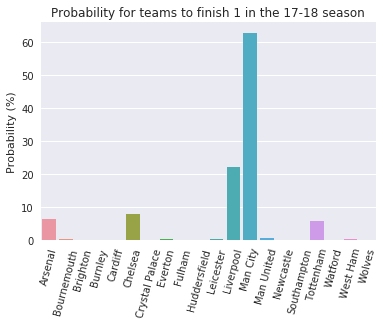

In [49]:
draw_prob_plots(standings_sim_19,1.0)

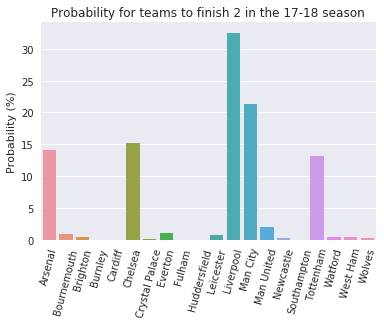

In [50]:
draw_prob_plots(standings_sim_19,2.0)

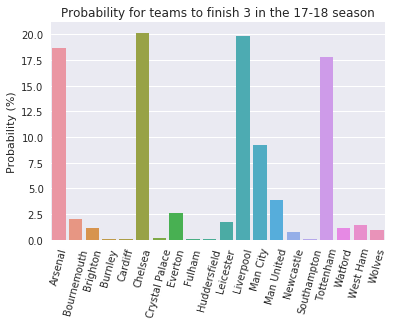

In [51]:
draw_prob_plots(standings_sim_19,3.0)

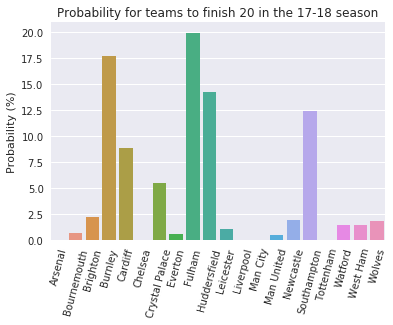

In [52]:
draw_prob_plots(standings_sim_19,20.0)

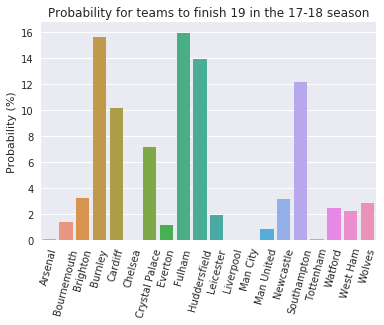

In [53]:
draw_prob_plots(standings_sim_19,19.0)

## 4. Conclusions

To conclude, Bayesian Inference is an incredibly powerful method that enables very fine tuned predictions. When applying this method to sports' analytics the results have been promising. The proposed model does a decent job predicting the top spots of the table but is not that accurate when it comes to the bottom teams. It needs to be said that football is one of the sports where carrying a prediction out becomes more challenging. This is due to the fact that the results have very low scoring (compared with other sports such as American football or basketball) and this makes a good prediction even more of a challenge.

However, in general, the results have been satisfactory and the utility of Bayesian Inference when it comes to prediction has been proved.

## 5. References

Anh, L.H., Dong, L.S., Kreinovich, V., Thach, N.N (2018). *Econometrics for Financial Applications*, 1st edn (Springer International Publishing).

Box G. and Tiao G.C. (1992). *Bayesian inference in statistical analysis*, 1st edn (Wiley).

Brooks-Barlett J. (2018). *Probability concepts explained: Bayesian inference for parameter estimation* (Towards Data Science).

Kumam, .W, Saipara, P. and Kumam, P. (2017). *Bayesian Inference Application*, 10.5772/intechopen.70530.

Green, M. (2017). *The truth about Bayesian priors and overfitting* (Towards Data Science).

Van Wijk, N. (2012). *Soccer Analytics: Predicting the outcome of soccer matches*, Research Paper Business Analytics (VU University of Amsterdam).

Baio, G. and Blangiardo, M. (2010). *Bayesian hierarchical model for the prediction of football results*, Journal of Applied Statistics, 37:2, 253-264.